In [1]:
import numpy as np
from matplotlib import pyplot as plt
from particula import particle, u
from particula.util.lf2013_coagulation import lf2013_coag_full

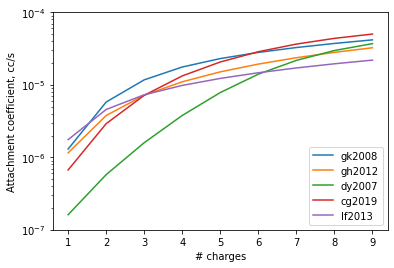

In [40]:
approx = ["gk2008", "gh2012", "dy2007", "cg2019"]
for i in range(len(approx)):
    shared_dict = {
        "temperature": 278,
        "coagulation_approximation": approx[i]
    }
    positive_particles = [
        particle.Particle(
            **shared_dict,
            particle_radius=3e-9,
            particle_charge=i,
            particle_density=1700,
        ) for i in range(1, 10)
    ]
    negative_ion = particle.Particle(
        **shared_dict,
        particle_radius=0.45e-9,
        particle_charge=-1,
        particle_density=1860,
    )
    coags = [
        negative_ion.coagulation(particle)
        for particle in positive_particles
    ]
    coags_ccps_mags = [
        coags[index].to("cc/s").m
        for index in range(0, 9)
    ]
    plt.semilogy(range(1,10), np.array(coags_ccps_mags).squeeze(), label=approx[i]);
   


ret = np.nan_to_num(lf2013_coag_full(
        ion_type="air",
        particle_type="conductive",
        temperature_val=298.15,
        pressure_val=101325,
        charge_vals=np.arange(1, 10),
        radius_vals=10e-9,)[0], 0)
plt.semilogy(range(1,10),  np.array(ret*1e6).squeeze(), label="lf2013");
plt.ylim([1e-7, 1e-4]); plt.ylabel("Attachment coefficient, cc/s"); plt.legend(); plt.xlabel("# charges"); 